In [1]:
%load_ext autoreload
%autoreload 2
import math
import numpy as np


from sklearn.cross_validation import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

SEED = 199 

/extdrive1/anaconda3/envs/amlenv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = np.load('X.npy')
y = np.load('y.npy')
print(X[0:1,:])

print(X.shape, y.shape,sep='\n')
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.33, random_state=SEED)



print(X_train.shape, X_test.shape,sep='\n')

[[-1.69864255  0.60587297  1.08623665 -1.35907589  0.09175171 -1.72917063
   0.32811388 -1.33958995  1.5332894   1.61508971  0.84722853 -1.62794317
  -1.52995417  1.12233683  1.2499034  -0.25931899  0.         -0.98360875
  -0.14856415  0.14856415  1.5279518  -0.99834025 -0.42239949 -0.22830453
  -1.02373279  1.02373279 -0.49957247  0.49957247 -0.97949492  0.97949492
   0.         -0.65835683 -0.81664618  1.53652841 -0.1517957  -0.12879773
  -0.12938451 -0.14993255 -0.14976212 -0.14856415 -0.13189904 -0.14526706
  -0.1514585  -0.12977432 -0.15463491 -0.14438795 -0.14314887 -0.13698402
  -0.14526706 -0.14027892 -0.14993255 -0.14118155 -0.14082114 -0.15313776
  -0.13399234 -0.13900615 -0.15010279 -0.13698402 -0.14082114 -0.14856415
  -0.1338033  -0.14596685 -0.1358693  -0.15078204 -0.13698402 -0.13937089
  -0.14064061 -0.15297059 -0.14735729 -0.13605567 -0.14009775 -0.14959152
  -0.13679882 -0.14189985 -0.14596685 -0.13304464 -0.14770303 -0.14561734
  -0.14243638 -0.13624181  6.71558628 

In [3]:
import torch
from torch.utils.data import TensorDataset,DataLoader

X_train,y_train = torch.FloatTensor(X_train), torch.FloatTensor(y_train)
print(X_train.shape)
batch_size = 512
dataset = TensorDataset(X_train,y_train)
dataloader = DataLoader(dataset, 
                              batch_size = batch_size,
                              shuffle = True)

torch.Size([13713, 88])


In [4]:
hyper_params = {'nn_lr':1e-2,
               'lh_lr':1e-3,
               'epochs':100,
               'grid_size':64,
               'grid_bounds':(-1,1),
               'latent_dim':2,
               'input_dim':X_train.size(1),
               'num_mixtures':4
              }

In [5]:

from trainer import SvDklTrainer
trainer = SvDklTrainer(hyper_params, aml_run=None)

{'nn_lr': 0.01, 'lh_lr': 0.001, 'epochs': 100, 'grid_size': 64, 'grid_bounds': (-1, 1), 'latent_dim': 2, 'input_dim': 88, 'num_mixtures': 4}


In [6]:
trainer.fit(dataloader)

Train Epoch: 1 [002/027], Loss: 0.832322
Train Epoch: 1 [004/027], Loss: 0.808846
Train Epoch: 1 [006/027], Loss: 0.857526
Train Epoch: 1 [008/027], Loss: 0.844011
Train Epoch: 1 [010/027], Loss: 0.847975
Train Epoch: 1 [012/027], Loss: 0.822757
Train Epoch: 1 [014/027], Loss: 0.812246
Train Epoch: 1 [016/027], Loss: 0.827365
Train Epoch: 1 [018/027], Loss: 0.818650
Train Epoch: 1 [020/027], Loss: 0.799618
Train Epoch: 1 [022/027], Loss: 0.846374
Train Epoch: 1 [024/027], Loss: 0.813859
Train Epoch: 1 [026/027], Loss: 0.795803
Train Epoch: 2 [002/027], Loss: 0.816637
Train Epoch: 2 [004/027], Loss: 0.817900
Train Epoch: 2 [006/027], Loss: 0.823469
Train Epoch: 2 [008/027], Loss: 0.818156
Train Epoch: 2 [010/027], Loss: 0.822627
Train Epoch: 2 [012/027], Loss: 0.818128
Train Epoch: 2 [014/027], Loss: 0.809652
Train Epoch: 2 [016/027], Loss: 0.787893
Train Epoch: 2 [018/027], Loss: 0.786047
Train Epoch: 2 [020/027], Loss: 0.788017
Train Epoch: 2 [022/027], Loss: 0.808631
Train Epoch: 2 [

Train Epoch: 16 [010/027], Loss: 0.684907
Train Epoch: 16 [012/027], Loss: 0.681514
Train Epoch: 16 [014/027], Loss: 0.679817
Train Epoch: 16 [016/027], Loss: 0.684270
Train Epoch: 16 [018/027], Loss: 0.676697
Train Epoch: 16 [020/027], Loss: 0.681245
Train Epoch: 16 [022/027], Loss: 0.679829
Train Epoch: 16 [024/027], Loss: 0.685326
Train Epoch: 16 [026/027], Loss: 0.682766
Train Epoch: 17 [002/027], Loss: 0.681554
Train Epoch: 17 [004/027], Loss: 0.679777
Train Epoch: 17 [006/027], Loss: 0.686084
Train Epoch: 17 [008/027], Loss: 0.677543
Train Epoch: 17 [010/027], Loss: 0.677748
Train Epoch: 17 [012/027], Loss: 0.676495
Train Epoch: 17 [014/027], Loss: 0.677577
Train Epoch: 17 [016/027], Loss: 0.672989
Train Epoch: 17 [018/027], Loss: 0.681081
Train Epoch: 17 [020/027], Loss: 0.678340
Train Epoch: 17 [022/027], Loss: 0.676359
Train Epoch: 17 [024/027], Loss: 0.676855
Train Epoch: 17 [026/027], Loss: 0.683398
Train Epoch: 18 [002/027], Loss: 0.677115
Train Epoch: 18 [004/027], Loss: 0

Train Epoch: 31 [014/027], Loss: 0.654789
Train Epoch: 31 [016/027], Loss: 0.657177
Train Epoch: 31 [018/027], Loss: 0.653984
Train Epoch: 31 [020/027], Loss: 0.656419
Train Epoch: 31 [022/027], Loss: 0.647288
Train Epoch: 31 [024/027], Loss: 0.662278
Train Epoch: 31 [026/027], Loss: 0.653970
Train Epoch: 32 [002/027], Loss: 0.643377
Train Epoch: 32 [004/027], Loss: 0.658593
Train Epoch: 32 [006/027], Loss: 0.655569
Train Epoch: 32 [008/027], Loss: 0.649934
Train Epoch: 32 [010/027], Loss: 0.659861
Train Epoch: 32 [012/027], Loss: 0.666988
Train Epoch: 32 [014/027], Loss: 0.652000
Train Epoch: 32 [016/027], Loss: 0.655280
Train Epoch: 32 [018/027], Loss: 0.655018
Train Epoch: 32 [020/027], Loss: 0.648121
Train Epoch: 32 [022/027], Loss: 0.665784
Train Epoch: 32 [024/027], Loss: 0.646008
Train Epoch: 32 [026/027], Loss: 0.651986
Train Epoch: 33 [002/027], Loss: 0.651682
Train Epoch: 33 [004/027], Loss: 0.657745
Train Epoch: 33 [006/027], Loss: 0.643918
Train Epoch: 33 [008/027], Loss: 0

Train Epoch: 46 [020/027], Loss: 0.651115
Train Epoch: 46 [022/027], Loss: 0.642314
Train Epoch: 46 [024/027], Loss: 0.628074
Train Epoch: 46 [026/027], Loss: 0.648425
Train Epoch: 47 [002/027], Loss: 0.636088
Train Epoch: 47 [004/027], Loss: 0.648517
Train Epoch: 47 [006/027], Loss: 0.652560
Train Epoch: 47 [008/027], Loss: 0.654206
Train Epoch: 47 [010/027], Loss: 0.643948
Train Epoch: 47 [012/027], Loss: 0.651087
Train Epoch: 47 [014/027], Loss: 0.653204
Train Epoch: 47 [016/027], Loss: 0.639611
Train Epoch: 47 [018/027], Loss: 0.643330
Train Epoch: 47 [020/027], Loss: 0.637676
Train Epoch: 47 [022/027], Loss: 0.640993
Train Epoch: 47 [024/027], Loss: 0.636944
Train Epoch: 47 [026/027], Loss: 0.642044
Train Epoch: 48 [002/027], Loss: 0.646745
Train Epoch: 48 [004/027], Loss: 0.644446
Train Epoch: 48 [006/027], Loss: 0.648457
Train Epoch: 48 [008/027], Loss: 0.639064
Train Epoch: 48 [010/027], Loss: 0.647741
Train Epoch: 48 [012/027], Loss: 0.636073
Train Epoch: 48 [014/027], Loss: 0

Train Epoch: 61 [026/027], Loss: 0.640885
Train Epoch: 62 [002/027], Loss: 0.637992
Train Epoch: 62 [004/027], Loss: 0.644818
Train Epoch: 62 [006/027], Loss: 0.641414
Train Epoch: 62 [008/027], Loss: 0.649671
Train Epoch: 62 [010/027], Loss: 0.640419
Train Epoch: 62 [012/027], Loss: 0.633579
Train Epoch: 62 [014/027], Loss: 0.617651
Train Epoch: 62 [016/027], Loss: 0.649454
Train Epoch: 62 [018/027], Loss: 0.642380
Train Epoch: 62 [020/027], Loss: 0.633068
Train Epoch: 62 [022/027], Loss: 0.632920
Train Epoch: 62 [024/027], Loss: 0.656778
Train Epoch: 62 [026/027], Loss: 0.637089
Train Epoch: 63 [002/027], Loss: 0.643965
Train Epoch: 63 [004/027], Loss: 0.610712
Train Epoch: 63 [006/027], Loss: 0.638968
Train Epoch: 63 [008/027], Loss: 0.646238
Train Epoch: 63 [010/027], Loss: 0.643189
Train Epoch: 63 [012/027], Loss: 0.629778
Train Epoch: 63 [014/027], Loss: 0.650518
Train Epoch: 63 [016/027], Loss: 0.649699
Train Epoch: 63 [018/027], Loss: 0.642172
Train Epoch: 63 [020/027], Loss: 0

Train Epoch: 77 [002/027], Loss: 0.638798
Train Epoch: 77 [004/027], Loss: 0.628417
Train Epoch: 77 [006/027], Loss: 0.637191
Train Epoch: 77 [008/027], Loss: 0.648295
Train Epoch: 77 [010/027], Loss: 0.636339
Train Epoch: 77 [012/027], Loss: 0.638851
Train Epoch: 77 [014/027], Loss: 0.626935
Train Epoch: 77 [016/027], Loss: 0.645938
Train Epoch: 77 [018/027], Loss: 0.637997
Train Epoch: 77 [020/027], Loss: 0.637162
Train Epoch: 77 [022/027], Loss: 0.643020
Train Epoch: 77 [024/027], Loss: 0.645345
Train Epoch: 77 [026/027], Loss: 0.623572
Train Epoch: 78 [002/027], Loss: 0.648744
Train Epoch: 78 [004/027], Loss: 0.638448
Train Epoch: 78 [006/027], Loss: 0.631842
Train Epoch: 78 [008/027], Loss: 0.651595
Train Epoch: 78 [010/027], Loss: 0.645531
Train Epoch: 78 [012/027], Loss: 0.635471
Train Epoch: 78 [014/027], Loss: 0.632302
Train Epoch: 78 [016/027], Loss: 0.631258
Train Epoch: 78 [018/027], Loss: 0.646771
Train Epoch: 78 [020/027], Loss: 0.631701
Train Epoch: 78 [022/027], Loss: 0

Train Epoch: 92 [008/027], Loss: 0.634786
Train Epoch: 92 [010/027], Loss: 0.635332
Train Epoch: 92 [012/027], Loss: 0.633739
Train Epoch: 92 [014/027], Loss: 0.629209
Train Epoch: 92 [016/027], Loss: 0.633090
Train Epoch: 92 [018/027], Loss: 0.633707
Train Epoch: 92 [020/027], Loss: 0.633859
Train Epoch: 92 [022/027], Loss: 0.646962
Train Epoch: 92 [024/027], Loss: 0.628600
Train Epoch: 92 [026/027], Loss: 0.640541
Train Epoch: 93 [002/027], Loss: 0.631224
Train Epoch: 93 [004/027], Loss: 0.631235
Train Epoch: 93 [006/027], Loss: 0.642399
Train Epoch: 93 [008/027], Loss: 0.621265
Train Epoch: 93 [010/027], Loss: 0.643249
Train Epoch: 93 [012/027], Loss: 0.639086
Train Epoch: 93 [014/027], Loss: 0.632541
Train Epoch: 93 [016/027], Loss: 0.630434
Train Epoch: 93 [018/027], Loss: 0.632486
Train Epoch: 93 [020/027], Loss: 0.643419
Train Epoch: 93 [022/027], Loss: 0.638384
Train Epoch: 93 [024/027], Loss: 0.634261
Train Epoch: 93 [026/027], Loss: 0.643266
Train Epoch: 94 [002/027], Loss: 0

In [7]:
X_test,y_test = torch.FloatTensor(X_test), torch.FloatTensor(y_test)
print(X_test.shape)
batch_size = 512
dataset = TensorDataset(X_test,y_test)
test_dataloader = DataLoader(dataset, 
                              batch_size = batch_size,
                              shuffle = True)

torch.Size([6755, 88])


In [8]:
trainer.eval(test_dataloader)

AUC score:  0.51
Accuracy score:  0.11


In [216]:
import torch.optim as optim
class Net(nn.Module):
    
    def __init__(self,data_dim):
        super().__init__()
        self.fc1 = nn.Linear(data_dim, 400)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(400, 200)
        self.relu2 = nn.ReLU()
        self.dout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(200, 50)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(50, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.relu2(a2)
        a3 = self.dout2(h2)
        h3 = self.fc3(a3)
        a3 = self.relu3(h3)
        fc4 =self.fc4(a3)
        y = self.out_act(fc4)
        return y
    
net = Net(X_train.shape[1])
opt = optim.Adam(net.parameters(), lr=1e-2, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [217]:
def train_epoch(model, opt, criterion, dataloader, batch_size=50):
    model.train()
    losses = []
    for i, (x,y) in enumerate(dataloader):

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x)
        # (2) Compute diff
        loss = criterion(y_hat, y)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

/extdrive1/anaconda3/envs/amlenv/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/extdrive1/anaconda3/envs/amlenv/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([401])) that is different to the input size (torch.Size([401, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


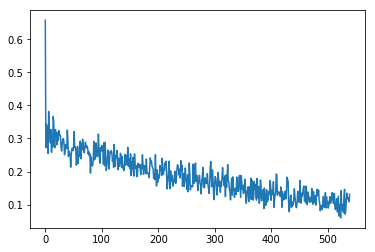

In [218]:
import matplotlib.pyplot as plt
%matplotlib inline

e_losses = []
num_epochs = 20
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion,dataloader)
plt.plot(e_losses)

In [219]:
test_dataset = utils.TensorDataset(torch.FloatTensor(X_test),
                                   torch.FloatTensor(y_test))
test_dataloader = utils.DataLoader(test_dataset,batch_size=24)

y_pred_lst = []
y_truth_lst = []

with torch.no_grad():
    for i, (X, y) in enumerate(test_dataloader):
        
        output = net(X)
        
        y_pred = output.ge(0.5).float().cpu().numpy()
        y_pred_lst.append(y_pred)
        y_truth_lst.append(y.numpy())
        
    truth = np.concatenate(y_truth_lst)
    pred =  np.concatenate(y_pred_lst)
   
    auc = roc_auc_score(truth,pred)
    accuracy = accuracy_score(truth,pred)   
    
print("AUC score: ",round(auc,2))
print("Accuracy score: ",round(accuracy,2))

AUC score:  0.68
Accuracy score:  0.91
